<a href="https://colab.research.google.com/github/AldoEHF14/SciKitLearn-Machine-Learning/blob/main/RedNeuronal_Prediccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Neuronal - Predicción
## ¿Que es una Red Neorunal Predictiva?

Una red neuronal predictiva es un tipo de red neuronal artificial que se entrena con datos históricos para aprender patrones y relaciones complejas entre variables, con el objetivo de hacer predicciones sobre datos futuros o desconocidos.

## ¿Para qué se utiliza?
Regresión (valores continuos):

- Predecir el precio de una casa.
- Estimar la temperatura de mañana.
- Pronosticar la demanda de un producto.



## Ejemplo

Mostramos cómo entrenar una red neuronal, para poder predecir valores, e incluso utilizamos un ciclo While, muy sencillo, que nos permitirá buscar el modelo que tenga el valor de Score más alto (Buen nivel de presicion). Tiempo en que se tarda un celular en cargarse y el procentaje de carga de la bateria

Scikit-Learn:
[MLP](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

Dataset de prueba: [Dataset](https://docs.google.com/spreadsheets/d/1pJ7kE8UXpn8Zzn6J7M9IAbECMJpkJwNipSwcc693nFQ/edit?gid=0#gid=0)

Este dataset contiene la carga de un bateria el cual este tiene dos columnas Tiempo y Carga, el cual cuenta con 36 registros cada uno.  

In [ ]:
""" Importar librerías """
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


In [ ]:
#Leer archivo desde el escritorio (Google Colab)
from google.colab import files
uploaded = files.upload()

Saving bateria.csv to bateria.csv


In [ ]:
# Leer el archivo CSV
datos = pd.read_csv("bateria.csv")

# Extraer las columnas como arrays de numpy
x = datos["Tiempo"].values
y = datos["Carga"].values

#Imprimir valores
# print(x)
# print(y)

# Convertir x a formato de matriz columna
X = x[:, np.newaxis]


In [ ]:
# Entrenar el modelo hasta que supere 95% de score


while True:
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

    mlp = MLPRegressor(hidden_layer_sizes=(3, 3),
                       solver='lbfgs',
                       alpha=1e-5,
                       random_state=1)

    mlp.fit(X_train, y_train)  # Corrección aquí

    score = mlp.score(X_train, y_train)
    #print("Score del entrenamiento:", score)

    if score > 0.95:
        break

# Predicción en t=20 minutos
prediccion = mlp.predict([[20]])

print(mlp.score(X_train,y_train))
print("Predicción en t=20 minutos:", prediccion[0])


0.9987390502448347
Predicción en t=20 minutos: 28.435062635628803


In [ ]:
#Impimir entrenamiento
print(X_train)
print(y_train)
print("Total: ",len(X_train))

[[  8]
 [ 68]
 [124]
 [ 72]
 [ 52]
 [100]
 [132]
 [ 48]
 [ 36]
 [140]
 [ 76]
 [ 80]
 [112]
 [ 84]
 [  4]
 [104]
 [ 12]
 [ 28]
 [ 96]
 [ 40]
 [  0]
 [136]
 [ 20]
 [ 64]
 [ 60]]
[ 14  82  98  84  65  95  99  61  47 100  87  89  97  90  10  96  19  38
  94  52   5  99  28  78  74]
Total:  25


In [ ]:
#Impimir prueba 30%
print(X_test)
print(y_test)
print("Total: ",len(X_test))


[[ 88]
 [128]
 [ 44]
 [ 16]
 [108]
 [120]
 [ 56]
 [116]
 [ 92]
 [ 24]
 [ 32]]
[92 99 56 24 97 98 70 98 93 33 42]
Total:  11


In [ ]:
## Predecir la salida para varios entradas.

# Creamos 40 valores en el intervalo [-5, 12]
X_p = np.linspace(0, 140, 40)

# X_test es un vector (1, 10), pero necesitamos un vector (10, 1)
X_p = X_p.reshape(-1,1)

# Hacer la predicción de los 10 puntos.
y_p = mlp.predict(X_p)


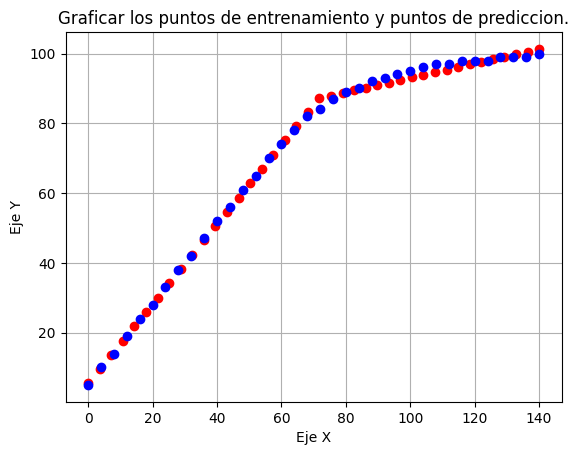

In [ ]:
## Graficar los puntos de entrenamiento (azul) y puntos estimados (rojo).

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(X_p, y_p, 'ro',  X, y, 'bo')
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Graficar los puntos de entrenamiento y puntos de prediccion.")
plt.grid(True)

plt.show()


In [ ]:
# Para predecir la clase de varios puntos de entrada con 30% del dataset
predicted = mlp.predict( X_test )
print(predicted)

#Salida real
print(y_test)


[90.54563842 98.83610433 55.67476136 23.69283588 94.69087138 97.17801115
 69.38130085 96.34896456 91.37468501 32.83052888 41.96822187]
[92 99 56 24 97 98 70 98 93 33 42]


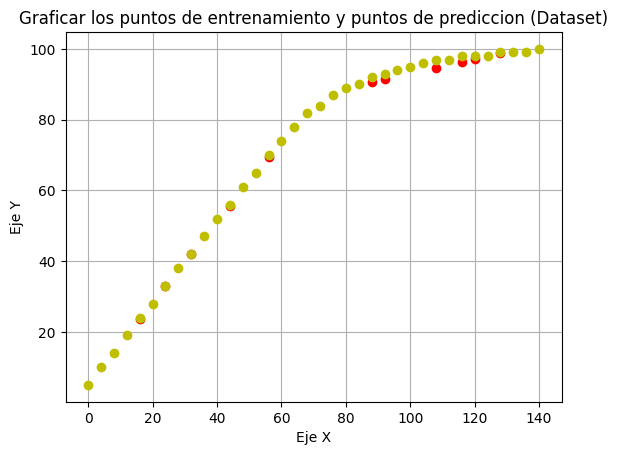

In [ ]:
# Graficar los puntos con 70% de entrenamiento(amarillo) y 30% de predicccion (rojo) del dataset

fig, ax = plt.subplots()

ax.plot(X_test, predicted, 'ro',  X, y, 'yo')
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Graficar los puntos de entrenamiento y puntos de prediccion (Dataset)")
plt.grid(True)

plt.show()
